In [7]:
import pandas as pd
import seaborn as sb


In [40]:
data=pd.read_csv("Mall_Customers.csv")

In [41]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [42]:
data[['Age','Annual Income (k$)','Spending Score (1-100)']]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [43]:
q1=data['Age'].quantile(0.25)
q2=data['Age'].quantile(0.50)
q3=data['Age'].quantile(0.75)

In [44]:
IQR=q3-q1

In [45]:
IQR

20.25

In [46]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

In [47]:
lower_limit

-1.625

In [48]:
upper_limit

79.375

In [50]:
data[(data['Age']<lower_limit)|(data['Age']>upper_limit)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

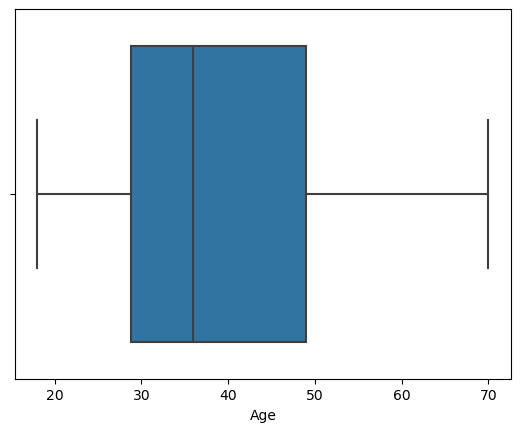

In [51]:
sb.boxplot(df['Age'])#BOXPLOT

In [52]:
q1=data['Annual Income (k$)'].quantile(0.25)
q2=data['Annual Income (k$)'].quantile(0.50)
q3=data['Annual Income (k$)'].quantile(0.75)

In [53]:
IQR=q3-q1

In [54]:
IQR

36.5

In [55]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

In [56]:
lower_limit

-13.25

In [57]:
upper_limit

132.75

In [59]:
data[(data['Annual Income (k$)']<lower_limit)|(data['Annual Income (k$)']>upper_limit)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

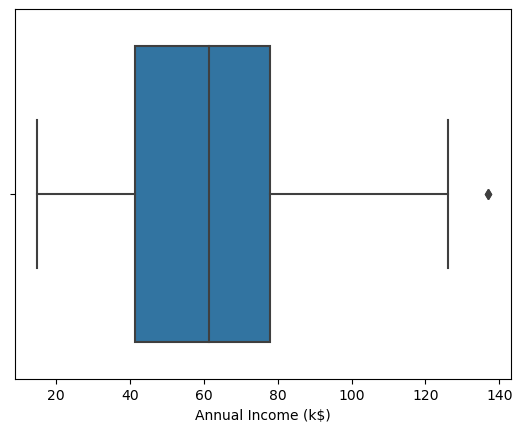

In [60]:
sb.boxplot(data['Annual Income (k$)'])#BOXPLOT

In [61]:
q1=data['Spending Score (1-100)'].quantile(0.25)
q2=data['Spending Score (1-100)'].quantile(0.50)
q3=data['Spending Score (1-100)'].quantile(0.75)

In [62]:
IQR=q3-q1

In [63]:
IQR

38.25

In [64]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

In [65]:
lower_limit

-22.625

In [66]:
upper_limit

130.375

In [67]:
data[(data['Spending Score (1-100)']<lower_limit)|(data['Spending Score (1-100)']>upper_limit)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

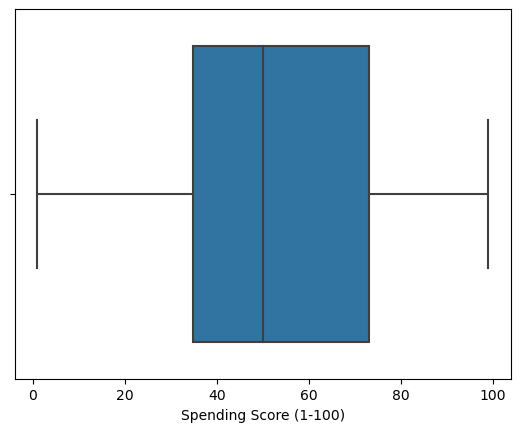

In [68]:
sb.boxplot(data['Spending Score (1-100)'])#BOXPLOT

In [69]:
def function(data,column_name):
    q1=data[column_name].quantile(0.25)
    q2=data[column_name].quantile(0.50)
    q3=data[column_name].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    return lower_limit,upper_limit

In [70]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [71]:
df1=['Age','Annual Income (k$)','Spending Score (1-100)']

In [72]:
df1

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [74]:
outlayers={}
for i in df1:
    lower_limit,upper_limit=function(data,i)
    outlayers[i]=[lower_limit,upper_limit]

In [75]:
outlayers

{'Age': [-1.625, 79.375],
 'Annual Income (k$)': [-13.25, 132.75],
 'Spending Score (1-100)': [-22.625, 130.375]}

In [76]:
data[data['Age']<outlayers['Age'][0]]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [80]:
data[(data['Age']<outlayers['Age'][0])|(data['Age']>outlayers['Age'][1])]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [81]:
data[(data['Annual Income (k$)']<outlayers['Annual Income (k$)'][0])|(data['Annual Income (k$)']>outlayers['Annual Income (k$)'][1])]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [82]:
data2=data[(data['Annual Income (k$)']<outlayers['Annual Income (k$)'][0])|(data['Annual Income (k$)']>outlayers['Annual Income (k$)'][1])]

In [83]:
data2.index

Int64Index([198, 199], dtype='int64')

In [85]:
data.drop([198,199])

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [88]:
#find out liers
outlayers={}
for i in df1:
    lower_limit,upper_limit=function(data,i)
    outlayers[i]=[lower_limit,upper_limit]

In [94]:
data[(data['Annual Income (k$)']<outlayers['Annual Income (k$)'][0])|(data['Annual Income (k$)']>outlayers['Annual Income (k$)'][1])]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [95]:
data[(data['Annual Income (k$)']<outlayers['Annual Income (k$)'][0])|(data['Annual Income (k$)']>outlayers['Annual Income (k$)'][1])].index.values

array([198, 199], dtype=int64)

In [96]:
droprow=[]
for i in data1:
    droprow.append(data[(data[i]<outlayers[i][0])|(data[i]>outlayers[i][1])

NameError: name 'droprow' is not defined